# Working with numerical and categorical data

It can be difficult to understand a dataset by looking at each individual observation.
We need methods to distill our data down into a smaller number of characteristics that can capture as much as possible  our original dataset.
We'll spend the next two weeks looking exclusively at ways to summarize our data with statistics and visualize our data, making it easier to communicate relationships between biological phenomena. 

Statistics and visualizations capture key qualities of our data.
Statistics often compress our data down into a small set of numerical values and can be incldued in a scientific report, or other communication.
Below we provide a general definition of a statistic, and the corresponding parameter, and discuss desirable properties of a statistic. 
Though statistics offer a convienant summary of a dataset, they do not allow us access to every observation from the original dataset.

Visualizations can be made for a small set of statistics, however, a major stremgth of visulizations is their ability to report all observations from a dataset, taking advantage of our ability to see patterns in data as a method of summary. 
Visualizations do not compress the data for us, rather they facilitate our ability to compress the data. 

Our goal for this week is to
 * Understand populations, samples, parameters, and statistics
 * Learn about frequently used statistic to summarize numerical and categorical data
 * Explore methods of visualizing data
 * Study a small number of ways to understand relationships between two variables. 


## Parameters are to the population as Statistics are to the sample

When we study the output a specific variable it is helpful to think of properties that belong to the **population** compared to properties that belong to your **sample**.
If you remember from last week, a **population** is the set of all possible observations of a variable.
We often denote the number of observations in the population, the number of all observations, with the letter $N$.
When we collect data from the population we take a **sample** a random subset of all observations. 
We often denote the number of observations in the **sample** with the letter $n$.

A **parameter** is any function from a population to the real number line (negative and positive numbers including decimals) and a **statistic** is any function from a sample dataset to the real number line,
\begin{align}
    f(\mathcal{D}) \to \mathcal{R}. 
\end{align}
where $\mathcal{D}$ is the set of all observations when we compute a **parameter** and is a subset of all observations when we compute a **statistic**, and $\mathcal{R}$ is the real number line.
This mathematical definition of a parameter and a statistic is broad, and you'll find some params/stats capture qualities of your data better than others.

As an example of applying the definition of statistic, consider a dataset $\mathcal{D}$ with 10 observations (rows) and 3 variables (columns) named $v_{1},v_{2}$, and $v_{3}$. 

In [25]:
# generate random dataaset with 10 rows and 3 columns
D = { "v1":[], "v2":[], "v3":[] } # first create a dictionary with 3 keys and empty lists as values
for col,vals in D.items(): # loop through the columns
    D[col] = list(np.random.random(size=10)) # a list of 10 random numbers between 0 and 1
D = pd.DataFrame(D) # convert our dictionary into a pandas dataframe

print(D)

         v1        v2        v3
0  0.709987  0.008341  0.710678
1  0.314621  0.234253  0.118566
2  0.256121  0.822209  0.545637
3  0.113084  0.904368  0.204145
4  0.165281  0.977053  0.167527
5  0.192744  0.330994  0.148759
6  0.048276  0.873247  0.901643
7  0.871867  0.967601  0.968328
8  0.955311  0.550778  0.365178
9  0.621940  0.930925  0.994026


We can define a statistic $S(v_{1})$ that computes the sum of $v_{1}$
\begin{align}
    S(v_{1}) = \sum_{\text{obs}=1}^{10} \mathcal{D}[ \text{obs}, v_{1}]
\end{align}
where $S(v_{1})$ is our statistic, $\sum$ is the summation operator, and $\mathcal{D}[ \text{obs}, v_{1}]$ is the "obs" row and $v_{1}$ column of our dataset.
In words, our statistic takes the sum of the $v_{1}$ column.

In [26]:
Sv1 = D["v1"].sum()
print("S(v1) = {:.2f}".format(Sv1)) # take a look at this syntax here: https://pyformat.info/

S(v1) = 4.25


$S(v_{1})$ is a statistic because it takes as input our dataset $\mathcal{D}$ (generated above) and outputs a decimal number, a number that is a member of the real number line.

Statistics like $S(v_{1})$ are not specific to a single generated dataset, but rather a specific data structure.
Our statistic $S(v_{1})$ requires our dataset $\mathcal{D}$ have a variable $v_{1}$.
There are no restrictions on the number of observations (rows) or on what type of data $v_{1}$ refers to.

We could have had $100$ observations

In [27]:
# generate random dataaset with 10 rows and 3 columns
D = { "v1":[], "v2":[], "v3":[] } # first create a dictionary with 3 keys and empty lists as values
for col,vals in D.items(): # loop through the columns
    D[col] = list(np.random.random(size=10**2)) # a list of 100 random numbers between 0 and 1
D = pd.DataFrame(D) # convert our dictionary into a pandas dataframe

print(D.head(15))

Sv1 = D["v1"].sum()
print("S(v1) = {:.2f} with 100 observations".format(Sv1))

          v1        v2        v3
0   0.111765  0.259112  0.426872
1   0.533311  0.535211  0.624941
2   0.697459  0.327226  0.786404
3   0.150202  0.055467  0.391050
4   0.338611  0.643141  0.060149
5   0.088781  0.717805  0.716647
6   0.399962  0.541522  0.286285
7   0.789399  0.477639  0.092080
8   0.987552  0.841219  0.693240
9   0.841058  0.063964  0.083979
10  0.993848  0.621953  0.796496
11  0.067171  0.385016  0.593295
12  0.450541  0.371491  0.662814
13  0.618060  0.249434  0.295322
14  0.761381  0.265513  0.814782
S(v1) = 51.96 with 100 observations


Or $v_{1}$ could refer to categories of data that take the values 0 and 1. 

In [28]:
# generate random dataaset with 10 rows and 3 columns
D = { "v1":[], "v2":[], "v3":[] } # first create a dictionary with 3 keys and empty lists as values
for col,vals in D.items(): # loop through the columns
    D[col] = [ 1 if np.random.random() > 0.5 else 0 for i in range(100)]
D = pd.DataFrame(D) # convert our dictionary into a pandas dataframe

print(D.head(15))
Sv1 = D["v1"].sum()
print("S(v1) = {:.2f} with v1 a variable that takes values of 0 or 1".format(Sv1))

    v1  v2  v3
0    0   0   1
1    1   0   1
2    1   1   1
3    1   1   1
4    0   0   1
5    0   0   0
6    0   0   1
7    1   1   1
8    1   0   0
9    0   0   1
10   0   0   1
11   1   1   1
12   0   0   0
13   0   1   1
14   1   1   1
S(v1) = 47.00 with v1 a variable that takes values of 0 or 1


Statistics play a central role in data science.
We will explore a diverse range of methods for summarizing data and explaining relationships between one or more variables. 
Our goal will be to understand the entire analysis pipeline: from data collection to a final report. 

# Visualizing and summarizing numerical data

Numerical data is defined as a set of observations whose values are elements of the real line (positive and negative numbers, including decimals). 

# Example dataset
We will explore a dataset collected by members of the California Safe Cosmetics Program (CSCP)
The CSCP states that their primary purpose is to collect information on potentially hazardous chemicals or ingredients put into cosmetics products.

Cosmetic products sold in California must report any ingredients suspected to cause cancer or reproductive harm---the list of reported ingredients can be found [here](https://www.cdph.ca.gov/Programs/CCDPHP/DEODC/OHB/CSCP/CDPH%20Document%20Library/chemlist.pdf).
To better inform consumers and policy/decision makers, the CSCP compiles data on these products 
where each row (observation) is a cosmetic product and all variables are in columns. 
A full description of the dataset is [here.](https://healthdata.gov/dataset/chemicals-cosmetics)

We will focus in our examples on products for hair care. 

In [29]:
# the dataset is in CSV format and pandas can import directly from a https request
data = pd.read_csv("https://data.chhs.ca.gov/dataset/596b5eed-31de-4fd8-a645-249f3f9b19c4/resource/57da6c9a-41a7-44b0-ab8d-815ff2cd5913/download/cscpopendata.csv")
hairCareProducts = data[data.PrimaryCategoryId==18] # haircare products are all recorded as category id 18

numOfObservations = len(hairCareProducts)
print("There are {:d}".format(numOfObservations))

There are 1620


Data was taken from the above URL and subset to Category 18 products: hair care products.
As a brief summary of the data, we can look at how many different chemicals are reported in hair care products and the distribution of the sum of the number of potentially hazard chemicals per company.

First the types of chemicals reported

In [30]:
typesOfChemicals = hairCareProducts.ChemicalName.unique() # lets look at the types of chemicals that are reported
print("Types of recorded chemicals ({:d} in total)".format(len(typesOfChemicals)) )

for chemicalType in typesOfChemicals:
    print( "Chemical type = {:s}".format(chemicalType) )

Types of recorded chemicals (68 in total)
Chemical type = Distillates (coal tar)
Chemical type = Estragole
Chemical type = Cocamide diethanolamine
Chemical type = Lauramide diethanolamine
Chemical type = Titanium dioxide
Chemical type = Methanol
Chemical type = Mineral oils, untreated and mildly treated
Chemical type = Coffea arabica extract
Chemical type = Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.
Chemical type = Trade Secret
Chemical type = Methyleugenol
Chemical type = Safrole
Chemical type = Styrene
Chemical type = Butylated hydroxyanisole
Chemical type = Acetaldehyde
Chemical type = Cocamide DEA
Chemical type = 1,4-Dioxane
Chemical type = Arsenic (inorganic arsenic compounds)
Chemical type = Dichloroacetic acid
Chemical type = Ethylene oxide
Chemical type = Formaldehyde (gas)
Chemical type = Lead
Chemical type = Dichloromethane (Methylene chloride)
Chemical type = Benzene
Chemical type = Benzyl chloride
Chemical type = N-Ni

In [31]:
# per company, sum up the total number of chemicals included in their products
def countNumberOfChems(subsetOfData):
    return pd.Series({"totalNumOfChems":subsetOfData.ChemicalCount.sum()})
sumOfChemsPerCompany = hairCareProducts.groupby(["CompanyId"]).apply(countNumberOfChems)

# min number of products
print("The min number of haz chems {:d}".format(sumOfChemsPerCompany.totalNumOfChems.min()))

# max number of products
print("The min number of haz chems {:d}".format(sumOfChemsPerCompany.totalNumOfChems.max()))

The min number of haz chems 0
The min number of haz chems 762


In [32]:
for companyID,companyChems in sumOfChemsPerCompany.iterrows():
    print("Compay={:d}, Total number of potentially hazardous chemicals = {:d}".format(companyID,companyChems.totalNumOfChems))

Compay=4, Total number of potentially hazardous chemicals = 7
Compay=18, Total number of potentially hazardous chemicals = 2
Compay=21, Total number of potentially hazardous chemicals = 30
Compay=23, Total number of potentially hazardous chemicals = 21
Compay=60, Total number of potentially hazardous chemicals = 26
Compay=67, Total number of potentially hazardous chemicals = 56
Compay=71, Total number of potentially hazardous chemicals = 0
Compay=77, Total number of potentially hazardous chemicals = 7
Compay=86, Total number of potentially hazardous chemicals = 51
Compay=89, Total number of potentially hazardous chemicals = 21
Compay=96, Total number of potentially hazardous chemicals = 20
Compay=99, Total number of potentially hazardous chemicals = 2
Compay=111, Total number of potentially hazardous chemicals = 3
Compay=116, Total number of potentially hazardous chemicals = 8
Compay=118, Total number of potentially hazardous chemicals = 4
Compay=120, Total number of potentially hazard

Though we can see the total number of potentially hazardous chemicals each company includes in their haircare products, it might be easier to explain this data by using summary statistics. 

## The mean
The first summary statistic is the mean---often called the average.
Suppose you have a single column of data (i.e. a single variable) that produces numerical values.  We can represent the column as a variable $X$, knowing that $X$ contains a list of ($n$) numerical values

\begin{align}
    X = [x_{1},x_{2},\cdots,x_{n}]
\end{align}

where $x_{1}, x_{2}$ and so are meant to represent numerical values.
For example,
\begin{align}
    X = [1.4,-0.56,23.45,7]
\end{align}

The mean $\bar{X}$ is computed as 

\begin{align}
    \bar{X} = (x_{1} + x_{2} + x_{3} + \cdots x_{n})/n
\end{align}

or the sum of all numerical values divided by the number of numerical values considered ($n$).
You may have heard that the mean describes the "central tendency" of your variable, a number future values of this variable may take. 
We'll find out why this is the case after we cover basic probability.

***

## Aside (Sigma Notation)

We can write the mean of a variable $X$ in a more compact form than we have above.
The key is using the symbol $\sum$.

Mathematicians typically use the symbol $\sum$ to stand for summing up a set of variables.
The set of variables can be assigned in a few different ways. 
The first way is to assign a value called an index to each number in the set you want to sum, then you can define 

\begin{align}
    \sum_{i=1}^{N} x_{i} = x_{1}+x_{2}+x_{3}+\cdots+x_{N}
\end{align}

where the above symbol means $x_{1}+x_{2}+x_{3}+\cdots+x_{N}$, or "sum up all the values from x_{1} to x_{N}". 
For example, I can define the variable $X=[1.4,-0.56,23.45,7]$ and assign
* $x_{1} = 1.4$
* $x_{2} = -0.56$
* $x_{3} = 23.45$
* $x_{4} = 7$

Then $\sum_{i=1}^{4} x_{i} = x_{1}+x_{2}+x_{3}+x_{4} = 1.4 + (-0.56) + 23.45 + 7 = 31.29$

Another way to define the set of number to sum is to place the set of indices underneath the $\sum$ symbol.
For example, 
\begin{align}
    \sum_{i \in {1,2,3,4} } x_{i} = x_{1}+x_{2}+x_{3}+x_{4}
\end{align}

Another example, summing the 1st and third values could be written

\begin{align}
    \sum_{i \in {1,3} } x_{i} = x_{1}+x_{3}
\end{align}

A third way to define a sum is by defining the set of indices to sum with a conditional statement. 
For example, suppose we want to sum all the values with indices less than 3. 
We can write

\begin{align}
    \sum_{i < 3 } x_{i} = x_{1}+x_{2}
\end{align}

***

We can rewrite the mean in a more compact form by using $\sum$ notation 

\begin{align}
    \bar{X} = \dfrac{\sum_{i=1}^{N} x_{i}}{N}
\end{align}

where $N$ is the total number of data points for the variable $X$.

Let's look at the average number of potentially hazardous chemicals companies place in their hair care products as reported by the California Safe Cosmetics Program (CSCP)

In [33]:
meanNumberOfChemicals = sumOfChemsPerCompany.mean()  # take mean of number of potenitally haz chemicals 
meanNumberOfChemicals = float(meanNumberOfChemicals) # make sure the number is a float (numerical value) 

print("The average number of potentially hazardous chemicals companies place in their haircare products is {:.2f}".format(meanNumberOfChemicals))

The average number of potentially hazardous chemicals companies place in their haircare products is 14.61


We see that the mean number of potentially hazardous chemicals placed in haircare products is 14.61. 
How can you have 0.61 of a product?
This illustrates an important characteristic of the mean: the mean value does **not** need to be one of the values you collected in your dataset. 
As a uncertainty scientist (statistician, biostatistician, data scientist, etc.) who needs to summarize the number of chemicals haircare products in CA contain, you may write something like this. 

The CSCP has collected data on XX haircare products which can contain 68 potentially hazardous chemicals. The average number of chemicals companies place in haircare products is 14.6. 

Now that we understand one way to describe a numerical variables' typical value, let's focus on one way to describe how values may vary around that mean value.


## Variance and standard deviation

The variance (Var) and, much more easy to communicate, standard deviation (SD), are common ways we can describe a variable's spread or how far values vary around their mean.

The variance is computed as 

\begin{align}
    \text{Var}(X) = \delta^{2}(X) = \dfrac{ (x_{1} - \bar{X})^{2} + (x_{2} - \bar{X})^{2} + (x_{1} - \bar{X})^{2} \cdots + (x_{n} - \bar{X})^{2}}{n-1}.
\end{align}
We can write this more compactly using sigma notation as 

\begin{align}
    \text{Var}(X) = \dfrac{ \sum_{i=1}^{n} (x_{i} - \bar{X})^{2}}{n-1} .
\end{align}

Let's build intuition about why the variance measures the "spread" or how much our data "varies". 
We can look just at a single term in the sum. 
For the first step, you compute the difference between a data point ($x_{i}$) and the mean $(\bar{X})$

\begin{align}
    (x_{i} - \bar{X}). 
\end{align}

The difference between data points and their mean is a measure of distance---the distance from the most typical value generated from your variable $X$.
But we may not be concerned about whether that distance is to the left (negative) or to the right (positive) of our mean. 
One way to ignore whether data points are negative or positive is to artificially make all distances positive, and one choice, the choice for variance, is to square these distances

\begin{align}
    (x_{i} - \bar X)^{2} .
\end{align}

Finally, we can compute individual squared differences for each data point but it may be easier to understand if we had a summary metric.
What is the typical or most common squared distance from the mean? 
To answer that question we can compute the mean squared difference,

\begin{align}
    \sum_{i=1}^{n} \dfrac{(x_{i} - \bar{X})^{2}}{n} .
\end{align}

However (we'll see why in a later class) the mean squared difference most often underestimates our true variance ($\sigma^2$).
And as a correction we divide by $n-1$, increasing our estimate of the variance. 

In [34]:
varNumberOfChemicals = sumOfChemsPerCompany.var()  # take variance of number of potenitally haz chemicals 
varNumberOfChemicals = float(varNumberOfChemicals) # make sure the number is a float (numerical value) 

print("The variance of potentially hazardous chemicals companies place in their haircare products is {:.2f}".format(varNumberOfChemicals))

The variance of potentially hazardous chemicals companies place in their haircare products is 3824.73


The variance has an embarrassing problem: it is super hard to interpret.
What is it saying? Why is it so hard to interpret?
The biggest problem with interpreting the variance is the units.
If we collect data $X$ measured in (say) inches, then the variance would measured in square inches (why?). 

To remedy this issue with units we can take the square root of the variance.
This is called the standard deviation

\begin{align}
    s^{2} = \left [ \sum_{i=1}^{n} \dfrac{(x_{i} - \bar{X})^{2}}{n-1} \right ]^{1/2} .
\end{align}

Lets see if the standard deviation is any easier to interpret in our example of the number of hazardous chemicals in haircare products.

In [35]:
stdNumberOfChemicals = sumOfChemsPerCompany.std()  # take std of number of potenitally haz chemicals 
stdNumberOfChemicals = float(stdNumberOfChemicals) # make sure the number is a float (numerical value) 

print("The standard deviation of potentially hazardous chemicals companies place in their haircare products is {:.2f}".format(stdNumberOfChemicals))

The standard deviation of potentially hazardous chemicals companies place in their haircare products is 61.84


One summary of our data could be:
CSCP reports that companies include 14.6 potentially hazardous chemicals across all their haircare products, and that this number of chemicals can vary to as little as 0 and as many as 762 (standard deviation = 61.8).

***

## QSA: Is the minimum a statistic?

***

## Histogram
 
A histogram displays on the horizontal axis a range of potential values of your data $(x_{1},x_{2},\cdots,x_{R})$, where $R$ is the user-selected range of values, and on the vertical axis counts of the number of data points that could fall between two values.
Order the range of potential values so that the smallest values is $x_{1}$ and the largest is x_{R}.
Take the smallest and second smallest value $(x_{1},x_{2})$, count the number of data points that are less than $x_{2}$ and larger or equal to $x_{1}$, $C(x_{1},x_{2})$ and plot a bar that extends from zero up to $C(x_{1},x_{2})$.
Continue this procedure for the 2nd and 3rd value, 3rd and 4th, up until x_{R-1} and x_{R}. 

We can build a histogram for the number of potentially hazardous chemicals reported by CSCP. 
For a range of potential number of chemicals, we will choose the values (often called bin edges) $0,5,10,15,\cdots,25$ and $30,130,230,\cdots 800$.
I chose this range of values for two reasons: (i) to illustrate the bin edges are your choice and (ii) the majority of data points fall between 0 and 25, with just one value above 700.

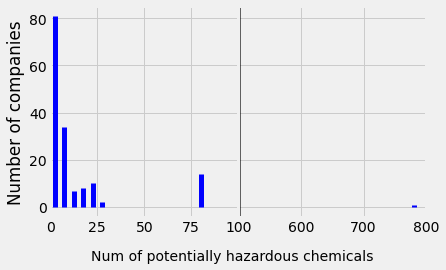

In [36]:
counts,bins = np.histogram( sumOfChemsPerCompany.totalNumOfChems, bins= list(np.arange(0,25+5,5)) + list(np.arange(30,800+100,100)) )

avgBins = [ 0.5*(x+y) for (x,y) in zip(bins,bins[1:])]

plt.style.use("fivethirtyeight")
fig,axs = plt.subplots(1,2,sharey=True)

ax=axs[0]
for b,c in zip(avgBins,counts):
    ax.plot([b]*2,[0,c],linewidth=5, color="blue")
ax.set_xlim(0,100)

ax.set_ylabel("Number of companies")

ax=axs[1]
for b,c in zip(avgBins,counts):
    ax.plot([b]*2,[0,c],linewidth=5, color="blue")
ax.set_xlim(500,800)
ax.set_xticks([600,700,800])
ax.axvline(501,color='k',alpha=0.60)

fig.text(x=0.50, y = 0.0, s = "Num of potentially hazardous chemicals", transform=fig.transFigure,ha='center')

plt.subplots_adjust(wspace=0,bottom=0.15)

This histogram quickly shows us the majority of companies include between $0$ and $5$ potentially hazardous chemicals across all their haircare products. Most companies include less than 25 chemicals, a small number include more than $75$, and one company includes more than $700$ chemicals across all products.

## More on the histogram

There area few standard terms uncertainty scientists use when they talk about histograms. 

### Mode and unimodal distributions
The mode of a variable is the **most likely value** that variable will take.
Let's look at two examples.

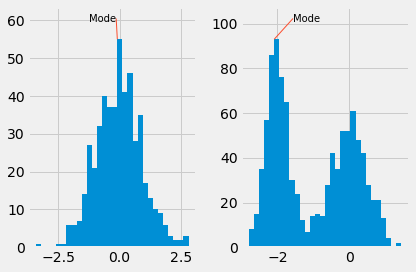

In [37]:
fig,axs = plt.subplots(1,2)

ax=axs[0]

samples = np.random.normal(0,1,500)
counts,bounds,patches = ax.hist(samples,30)

approx_mode = bounds[np.argmax(counts)]
mostCounts = np.max(counts)

if approx_mode <0:
    ax.plot([ approx_mode*1.5, approx_mode ],[ mostCounts*1.1,mostCounts], lw=1)
    ax.text( approx_mode*1.5,mostCounts*1.1,"Mode",fontsize=10,ha='right',va='center')
else:
    ax.plot([ approx_mode*0.5, approx_mode ],[ mostCounts*1.1,mostCounts], lw=1)
    ax.text( approx_mode*0.5,mostCounts*1.1,"Mode",fontsize=10,ha='right',va='center')
    
    
# second example
ax=axs[1]

samples00 = np.random.normal(0,0.5,500)
samples01 = np.random.normal(-2,0.3,500)

samples = list(samples00) + list(samples01)

counts,bounds,patches = ax.hist(samples,30)

approx_mode = bounds[np.argmax(counts)]
mostCounts = np.max(counts)

ax.plot([ approx_mode*0.75, approx_mode ],[ mostCounts*1.1,mostCounts], lw=1)
ax.text( approx_mode*0.75,mostCounts*1.1,"Mode",fontsize=10,ha='left',va='center')
 
fig.set_tight_layout(True)
plt.show()

The distribution on the left has a single peak, a place where the number of observations is highest within a left and right bound. 
We can approximate the mode by this place where counts are highest.
Distributions don't need to have a single peak (called **unimodel distributions**) to have a mode. 
Distributions can have several peaks (**multi-model distribution**) or other unusual qualities and still have a mode. 

## Symmetry and skew

We would call a variable's distribution of observations **symmetric** is there is some vertical line such that the counts of values to the left of the vertical line mirror the counts of values to the right of the vertical line. 
A distribution that is not **symmetric** is called **asymmetric**. 

There are many types of **asymmetric** distributions. But two common ways to describe asymmetry when a distribution is unimodel are left and right skew.
A distribution is **left skewed** if a small number of observations for a variable appear to the left of the mean. 
If there is a handful of observations that trail off to the right of the mean, the distribution could be described as having **right skew**.

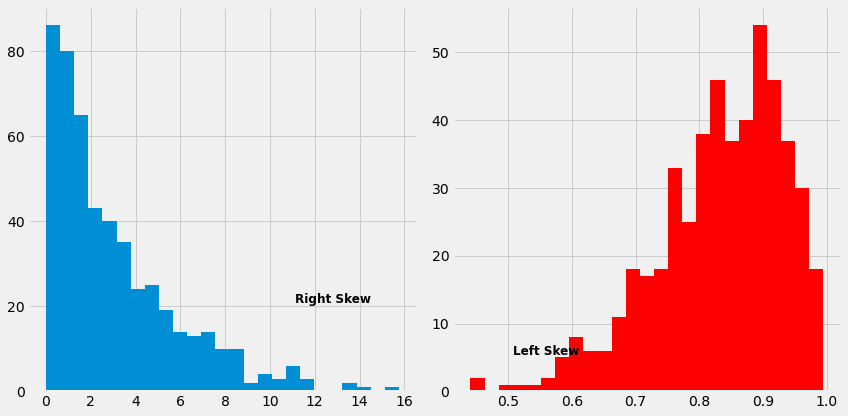

In [38]:
fig,axs = plt.subplots(1,2)

# right skewed dist
ax = axs[0]

samples = np.random.gamma(1,3,500)
counts,bounds,patches = ax.hist(samples,25)

ax.text( bounds[-3], (1+counts[-3])*10, "Right Skew"
        , fontsize=12,weight="bold", ha='right',va="bottom")
ax.tick_params(direction="in")

# left skewed dist
ax = axs[1]

samples = np.random.beta(10,2,500)
counts,bounds,patches = ax.hist(samples,25,color="red")

ax.text( bounds[3], 5.*(counts[3]), "Left Skew"
        , fontsize=12,weight="bold", ha='left',va="bottom")
ax.tick_params(direction="in")

fig.set_size_inches(12,6)
fig.set_tight_layout(True)

## The barplot

Categorical variables can be visualized by a barplot. 
The levels of the categorical variables are placed on the horizontal axis and, over top of each labeled level, a vertical bar is drawn corresponding to counts of observations that fall within each level.

Below is an example of a barplot built for a categorical variables with 100 observations and three levels. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


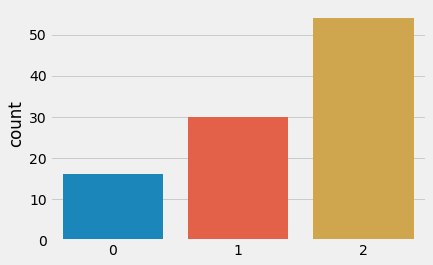

In [39]:
data = np.random.choice(a=[0,1,2],p=[0.1,0.3,0.6],size=100) # generate some random data

sns.countplot( data) # a barplot that uses counts like above is called a "countplot" in the Seaborn module
plt.show()           # show us the plot!

## Relationships between variables

Up until now the visualizations we discussed summary a single variabe from our dataset, but there are many visualizations that allow us to explore the relationships between more than a single variable. 

### Scatterplot

A scatter plot of two variables $X$ and $Y$ plots for each observation the point $(x_{i},y_{i})$ corresponding to the $i^{\text{th}}$ observation. 
A scatter plot is useful for plotting two continuous variables.

As an example, we will use data on the Aedes mosquito collected by the state of California in 2019.

Found on all continents, and transported to the southern Unites States through global trade and shipping, the Aedes mosquito---carrying yellow and dengue fever, the Zika virus, and Chikungunya---infects nearly 100 million people world wide and causes millions of deaths every year. The CDC, in an effort to prevent US infections, disease burden, and deaths, has issued an open challenge to predict Aedes incidence in the US. Accurate prediction of Aedes can significantly reduce disease burden, warning public health officals of a potential epidemic before it is too late.

        state  statefp   county  countyfp  year  month trap_type  \
0  California        6  Alameda         1  2013      4       CO2   
1  California        6  Alameda         1  2013      5       CO2   
2  California        6  Alameda         1  2013      6       CO2   
3  California        6  Alameda         1  2013      7       CO2   
4  California        6  Alameda         1  2013      8       CO2   

   num_collection_events  num_sites  num_trap_nights  num_aegypti_collected  \
0                     11         11               11                    0.0   
1                      9          9                9                    0.0   
2                     11         11               11                    0.0   
3                     15         15               15                    0.0   
4                     17         15               17                    0.0   

   num_albopictus_collected  num_collections_aegypti  \
0                       0.0                        0   
1   

Text(0, 0.5, 'Percent Aegypti')

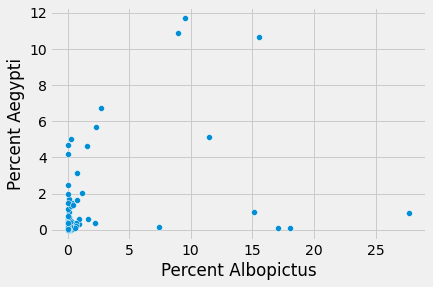

In [40]:
import pandas as pd # this module allows you to read in, and manipulate, a dataframe (data matrix)

# These two modules (a set of pre-packaged functions) are very useful for plotting/viz in python 
import matplotlib.pyplot as plt
import seaborn as sns

# the read_csv function is a part of pandas, and allows us to read into Python a dataframe in csv format
aedes = pd.read_csv("https://predict.cdc.gov/api/v1/attachments/aedes_challenge_2019/aedes_collections_california.csv")
print(aedes.head(5)) # this function allows us to print out 5 rows of our dataframe

# Above we assigned the variable "aedes" to the dataframe containing infromation on counts of Albopictus and Aegypti mosquitoes captured in the state of California. 

# We can add new variables to a dataframe by writing the name of the dataframe, and inside square brackets, 
# the name of the variable we will create. For example, below two new variables were created
# the first variable if called "pct_aegypti" and the second variable is called "pct_albo". 
aedes["pct_aegypti"] = aedes.num_aegypti_collected / aedes.num_collection_events
aedes["pct_albo"]    = aedes.num_albopictus_collected / aedes.num_collection_events

# we can also extract or refer to variables by calling the dataframe by name, a period, and then the variable name (see above)

# Finally, we can select specific rows and specific columns from our dataset by writing the datafrmae name , a period, and the function loc. The function loc takes as input a logical expression for rows and a logical expression for columns separated by a comma.  
# Below, we asked for all the rows where the variable "pct_albo" and the variable "pct_aegypti" are strictly greater than zero.  
aedes_above0 = aedes.loc[ (aedes["pct_albo"]>0) & (aedes["pct_aegypti"]>0),: ]

fig,ax = plt.subplots()

sns.scatterplot(x="pct_albo", y = "pct_aegypti" , data = aedes_above0,ax=ax )

ax.set_xlabel("Percent Albopictus")
ax.set_ylabel("Percent Aegypti")

### Box and whisker plot

The box and whisker plots a set of statistics: the 25th percentile, 50th percentile, 75th percentile, and 1.5 times the interquartile range.
The boxplot does not plot all observations from a dataframe and is useful for plotting a categorical variable against a continuous variable. 

#### Percentiles
The $q^{\text{th}}$ percentile of a variable $X$ is a **statistic** defined as the value $v$ such that $q$ percent of the values in $X$ are less than $v$. 
For example, the 25th percentile of $X$ is the value $v$ where 
 $$\frac{\text{Number values below }v}{\text{Number of values in }X } = 0.25  $$
 
The 50th percentile is given a special name, the median. 
The **interquartile range (IQR)** is the 75th percentile minus the 25th percentile and is a measure of the spread of values for a variable. 

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Percent of Aegypti Mosquito captured')

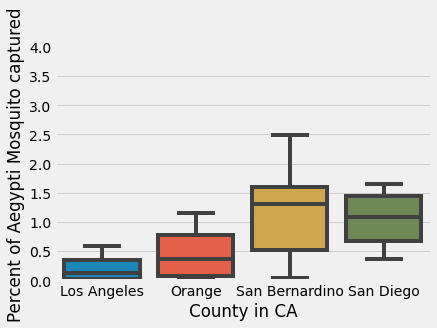

In [41]:
# Box and whisker plot
fig,ax = plt.subplots()
sns.boxplot("county","pct_aegypti", fliersize=0, data = aedes_above0,ax=ax)
ax.set_ylim(0,4)

ax.set_xlabel("County in CA")
ax.set_ylabel("Percent of Aegypti Mosquito captured")

Each box corresponds to a different category (in our case county in CA) and the y axis represents a continuous variable (in our case the percentage of captures that contained the Aegypti mosquito). 
The top and bottom of each box corresponds to the 75th and 25th percentile. 
The line inside the box is the 50th percentile (median) and the bar below the box is equal to the 25th percentile minus 1.5 times the IQR and the bar above the box is equal to the 75th percneitle plus 1.5 times the IQR.